# Predicting wine quality given chemical characteristics of the wine
by Yixuan Gao, Bryan Lee, Wangkai Zhu, Timothy Singh

## Summary

This project aims to build a machine learning model to classify the quality of red wine based on its physicochemical properties. The target variable, wine quality, is scored on a scale from 0 (poor quality) to 10 (high quality), presenting a multi-class classification challenge. The dataset, sourced from the UC Irvine Machine Learning Repository, comprises 1,599 observations with 11 continuous features such as acidity, alcohol content, and citric acid.

Four classification algorithms were evaluated: Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), and Support Vector Machine with a Radial Basis Function kernel (SVM RBF). 5-fold cross-validation was used with training data to find the best classification algorithm, based on accuracy. Hyperparameter tuning was used to optimize the model and assess its generalization performance. The model with hyperparameters that gave the best accuracy was selected for deployment on the test set.

By leveraging machine learning, this project seeks to provide a systematic and measurable way to predict wine quality, aiding manufacturers and suppliers in assessing product value based on its chemical properties.

## Introduction:


Red wine has been a cultural and economic staple since ancient times, originating from early civilizations like the Greeks and evolving into a global industry valued at approximately 109.5 billion USD. Despite its widespread availability, differentiating between high and low-quality wines remains a challenge for most consumers. Traditionally, this task has relied on the expertise of sommeliers, whose judgments are often subjective.

This project aims to bridge the gap between subjective assessments and objective measurement by utilizing machine learning to predict wine quality. By analyzing the physicochemical properties of red wine—such as acidity, alcohol content, and sugar levels—we aim to classify its quality on a scale from 0 to 10.

Using the Red Wine Quality Dataset from the UC Irvine Machine Learning Repository, we evaluate the performance of several classification algorithms: Logistic Regression, Decision Tree, KNN, and SVM with an RBF kernel. Through hyperparameter tuning and cross-validation, the goal is to identify the most accurate model and demonstrate the practical application of data-driven decision-making in the wine industry.

## Methods & Results:


### Data Loading

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [11]:
df = pd.read_csv('../data/winequality_red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Cleaning and Missing Value Handling

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

A thorough examination of the dataset revealed no missing values in any of the columns. This was verified by checking for null entries in all rows and columns using methods such as isnull() and info() in Python. Since the dataset was complete, no imputation or removal of rows/columns was necessary.

### Columns

- fixed acidity: grams of tartaric acid per cubic decimeter.
- volatile acidity: grams of acetic acid per cubic decimeter.
- citric acid: grams of citric acid per cubic decimeter.
- residual sugar: grams of residual sugar per cubic decimeter.
- chlorides: grams of sodium chloride per cubic decimeter.
- free sulfur dioxide: grams of unreacted sulfur dioxide per cubic decimeter.
- total sulfur dioxide: grams of total sulfur dioxide per cubic decimeter.
- density: density of the wine in grams per cubic decimeter.
- pH: pH value of the wine
- sulphates: grams of potassium sulphate per cubic decimeter
- alcohol : percentage volume of alcohol content.
- quality : integer range from 0 (representing low-quality) to 10 (representing high-quality).

### Exploratory Data Analysis (EDA)

The first step for our Exploratory Data Analysis I wanted to see if our features have a linear correlation with each other and the target. The below plot is a heatmap which shows the pearson correlation. 

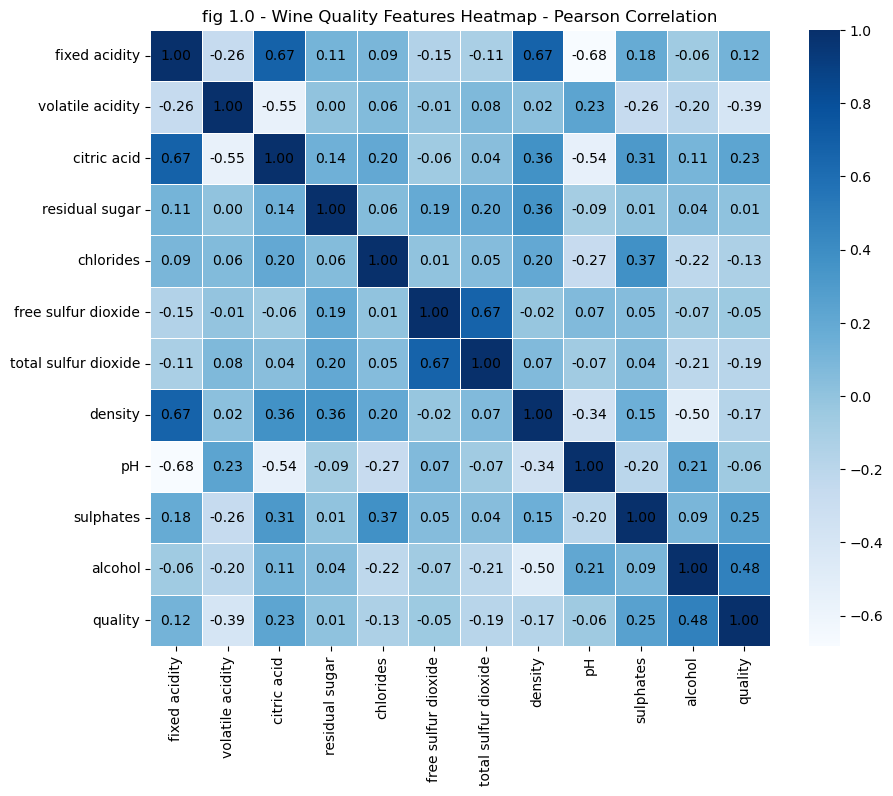

In [69]:
plt.figure(figsize=(10, 8)) 
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True, 
            annot_kws={'size': 10, 'color': 'black'}, linewidths=0.6)

plt.title(f"fig 1.0 - Wine Quality Features Heatmap - Pearson Correlation")
plt.show()

_Note that quality has the strongest r-square correlation with alchohol levels at 0.48, meaning alcohol levels is the feature with the highest linear relationship to the target, with sulphates having the second highest at 0.25._

### Analysis

In [5]:
# Creating our X and Y data
X = df.drop('quality', axis=1) 
y = df['quality']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Creating Column Transformer
numeric_features = list(X.columns)

preprocessor = make_column_transformer((StandardScaler(), numeric_features))

In [7]:
# Creating function to return accuracy of from each trained model
def cross_val_scores(model, X_train, y_train):
    """
    Returns mean accuracy from 5-fold cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        values for features from training data
    y_train : numpy array or pandas Series
        values for target from training data

    Returns
    ----------
        pandas Series with all mean scores from cross_validation
    """

    scores = cross_validate(model, 
                            X_train, 
                            y_train, 
                            cv = 5, 
                            return_train_score = True
                            )
    
    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    result_scores =[]
    for i in range(len(scores)):
        result_scores.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))


    return pd.Series(data=result_scores, index=mean_scores.index)

In [8]:
# Creation of model dictionary
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
    "log reg": LogisticRegression()
}

# Creation of results dictionary
results= {}

In [9]:
# Creation of model pipelines and cross-evaluation
for model_key, model in models.items():
    model_pipeline = make_pipeline(
        preprocessor,
        model
    )

    results[model_key] = cross_val_scores(model_pipeline,
                                                   X_train,
                                                   y_train)

results_df = pd.DataFrame(results).T
results_df

,fit_time,score_time,test_score,train_score
decision tree,0.007 (+/- 0.001),0.001 (+/- 0.000),0.588 (+/- 0.029),1.000 (+/- 0.000)
kNN,0.002 (+/- 0.000),0.007 (+/- 0.000),0.582 (+/- 0.027),0.719 (+/- 0.004)
RBF SVM,0.022 (+/- 0.000),0.013 (+/- 0.000),0.629 (+/- 0.019),0.679 (+/- 0.009)
log reg,0.009 (+/- 0.001),0.001 (+/- 0.000),0.604 (+/- 0.027),0.611 (+/- 0.009)


In [19]:
# Hyperparameter tuning for the best performing model
param_dist = {
    'svc__C': loguniform(1e-3, 1e3),
    'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svc__decision_function_shape': ['ovr', 'ovo'] 
}

svc_tuning = make_pipeline(preprocessor, SVC())

random_search = RandomizedSearchCV(svc_tuning, param_dist, 
                                   n_iter=50, cv=5, n_jobs=-1) #Do we want random_state?

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

Best hyperparameters: {'svc__C': np.float64(1.934556578726365), 'svc__decision_function_shape': 'ovr', 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Best cross-validation score: 0.6481740196078432


## Discussion:


summarize what you found

discuss whether this is what you expected to find?

discuss what impact could such findings have?

discuss what future questions could this lead to?

## References

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553. Retrieved from http://www3.dsi.uminho.pt/pcortez/wine/

UCI Machine Learning Repository. (n.d.). Wine quality dataset. Retrieved from https://archive.ics.uci.edu/dataset/186/wine+quality

Cortez, P., & Cerdeira, A. (2009). Modeling wine preferences by data mining from physicochemical properties. Retrieved from https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c